In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

url = "https://github.com/mwaskom/seaborn-data/raw/master/penguins.csv"
df = pd.read_csv(url)

# Быстрый взгляд
print("Размер исходных данных:", df.shape)
print(df.head())

# -------------------------------------------------- #
# 3. Минимальная очистка                            #
#    - удалим строки, где нет целевой переменной     #
#    - для простоты также отбросим строки с NaN      #
# -------------------------------------------------- #
df = df.dropna(subset=['species'])
df = df.dropna()
print("После очистки:", df.shape)

# ----------------------------------------------- #
# 4. Разделяем признаки и цель                    #
# ----------------------------------------------- #
X = df.drop('species', axis=1)                # все, кроме species
y = df['species']                             # целевая переменная

# Список числовых и категориальных колонок
categorical_cols = ['island', 'sex']
numeric_cols = ['bill_length_mm', 'bill_depth_mm',
                 'flipper_length_mm', 'body_mass_g']

# ----------------------------------------------- #
# 5. Построим пайплайн предобработки + модели     #
# ----------------------------------------------- #
# One-Hot для категорий, числа оставляем как есть
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ])

# Сам классификатор-дерево
tree_clf = DecisionTreeClassifier(
    criterion="entropy",         # критерий расщепления
    max_depth=None,
    random_state=42
)

# Склеиваем всё в единый конвейер: preprocessing → model
clf = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", tree_clf)
])

# ----------------------------------------------- #
# 6. Разбиваем выборку и обучаемся                #
# ----------------------------------------------- #
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,          # 20 % на тест
    stratify=y,              # пропорции классов сохраняем
    random_state=42
)

clf.fit(X_train, y_train)    # обучение




Размер исходных данных: (344, 7)
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
После очистки: (333, 7)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['island', 'sex']),
                                                 ('num', 'passthrough',
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

In [ ]:

# 7. Оценка качества                              #
y_pred = clf.predict(X_test)

print("\n=== КЛАССИФИКАЦИОННЫЙ ОТЧЁТ ===")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print(f"Точность (Accuracy): {acc:.3f}")



=== КЛАССИФИКАЦИОННЫЙ ОТЧЁТ ===
              precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67

Точность (Accuracy): 0.925


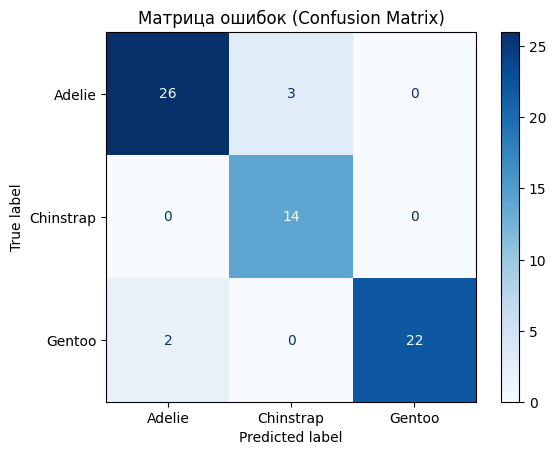

In [ ]:
# 8. Confusion Matrix       #
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Матрица ошибок (Confusion Matrix)")
plt.show()